<a href="https://www.kaggle.com/code/piyushjain572/function-transformers-log-reciprocal-square?scriptVersionId=199328129" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [20]:
import pandas as pd
import numpy as np

import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [21]:
df = pd.read_csv('/kaggle/input/modified-titanic-dataset/train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [22]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,1:3],
                                                df.iloc[:,0],
                                                test_size=0.2,
                                                random_state=2)
X_train.shape

(712, 2)

### **Note:** *Handling missing values is must before applying transformations and do it after train test split.*

In [23]:
X_train.isnull().sum()

Age     148
Fare      0
dtype: int64

In [24]:
mean = X_train['Age'].mean()
X_train['Age'] = X_train['Age'].fillna(mean)
X_test['Age'] = X_test['Age'].fillna(mean)

In [25]:
X_train.isnull().sum()

Age     0
Fare    0
dtype: int64

### Check which cols. to apply for transformation. 
### Apply transformations on those cols which are not normanlly distributed.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


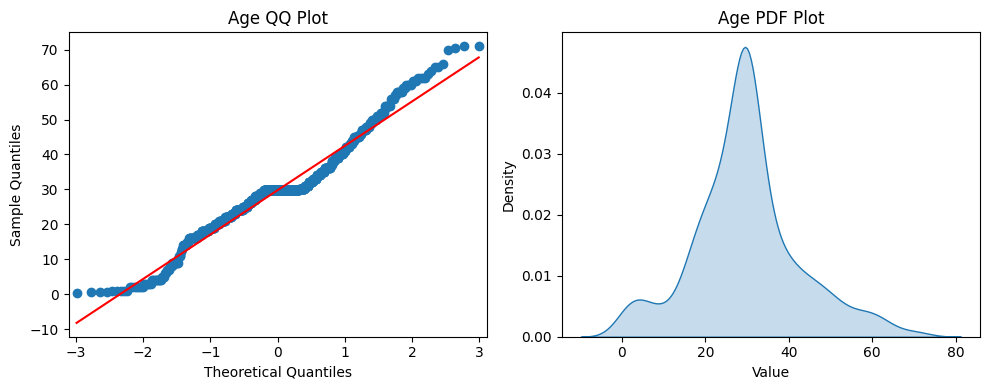

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))

# QQ plot
sm.qqplot(X_train['Age'], line='s', ax=axes[0])
axes[0].set_title('Age QQ Plot')

# PDF plot
sns.kdeplot(X_train['Age'], ax=axes[1], fill=True)
axes[1].set_title('Age PDF Plot')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Density')

# Show the plots
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


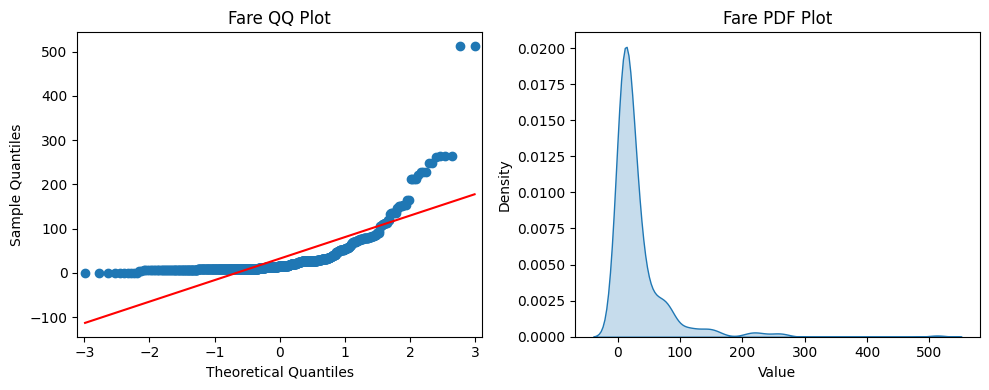

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# QQ plot
sm.qqplot(X_train['Fare'], line='s', ax=axes[0])
axes[0].set_title('Fare QQ Plot')

# PDF plot
sns.kdeplot(X_train['Fare'], ax=axes[1], fill=True)
axes[1].set_title('Fare PDF Plot')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Density')

# Show the plots
plt.tight_layout()
plt.show()

In [39]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [40]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)
    
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6145251396648045
Accuracy DT 0.6033519553072626


In [70]:
#Applying Transformations
trf = FunctionTransformer(func=np.log1p)

In [81]:
X_train_transformed = trf.fit_transform(X_train[['Fare']])
X_test_transformed = trf.transform(X_test[['Fare']])

In [82]:
X_train_transformed['Age'] = X_train['Age']
X_test_transformed['Age'] = X_test['Age']
X_test_transformed

,Fare,Age
707,3.306429,42.000000
37,2.202765,21.000000
615,4.189655,24.000000
169,4.051712,28.000000
68,2.188856,17.000000
...,...,...
89,2.202765,24.000000
80,2.302585,22.000000
846,4.256322,29.785904
870,2.185579,26.000000


In [83]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
    
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6368715083798883
Accuracy DT 0.6033519553072626


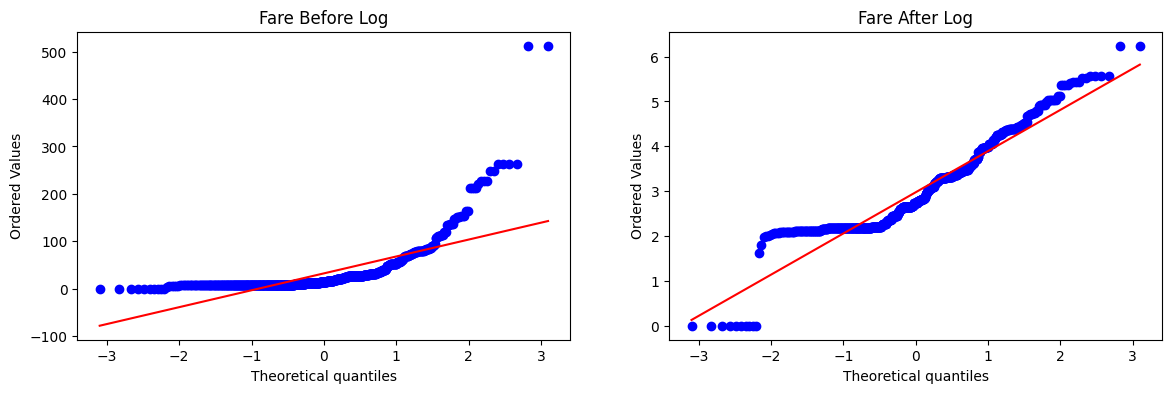

In [84]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

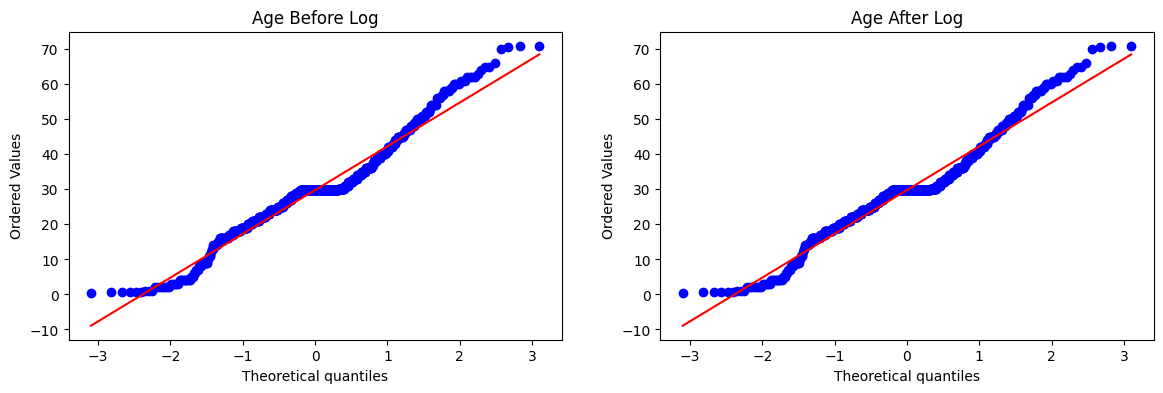

In [85]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

## Apply Custom function transformer

In [88]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    X['Age'] = X['Age'].fillna(X['Age'].mean())
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6195131086142323


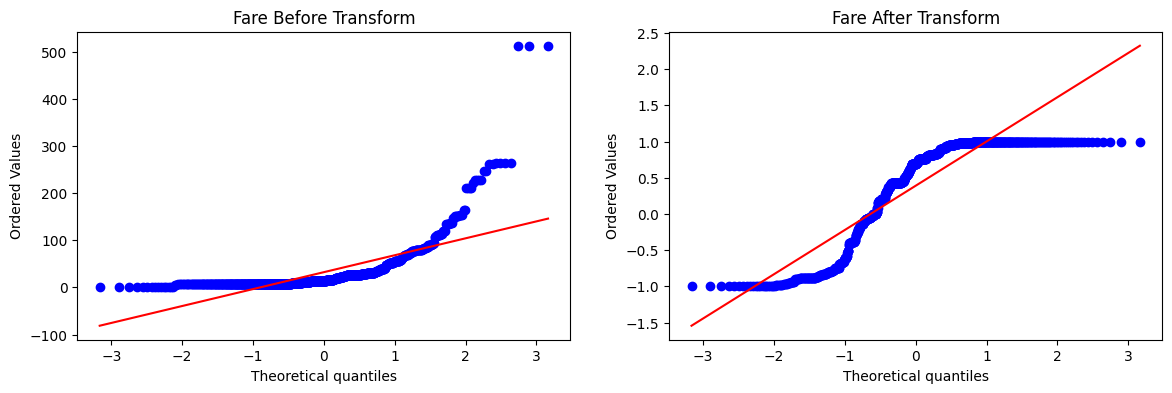

In [90]:
apply_transform(np.sin)

In [91]:
apply_transform(np.log) # Gives error because 0 is present in data
#Instead use np.log1p which adds 1 first then takes logs.

/opt/conda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1196, in fit
    X, y = self._validate_data(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py", line 921, in check_array
    _assert_all_finite(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py", line 161, in _assert_all_finite
    raise ValueError(msg_err)
ValueError: Input X contains infinity or a value too large for dtype('float64').


Accuracy 0.6712609238451936


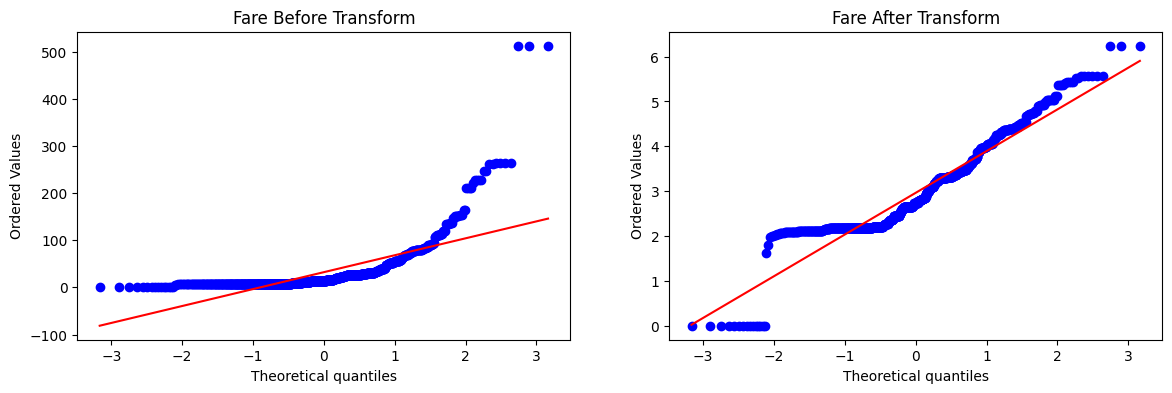

In [96]:
apply_transform(np.log1p)

Accuracy 0.61729088639201


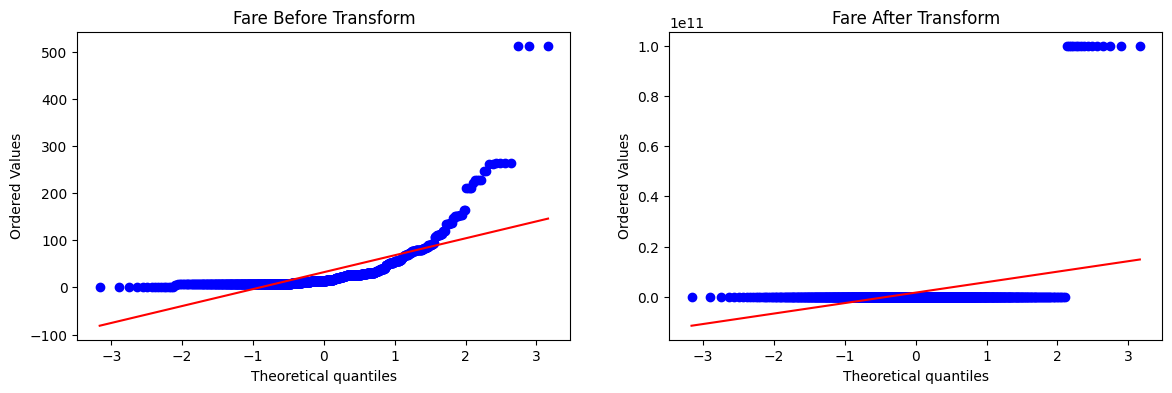

In [94]:
apply_transform(lambda x:1/(x+0.00000000001))

Accuracy 0.6611485642946316


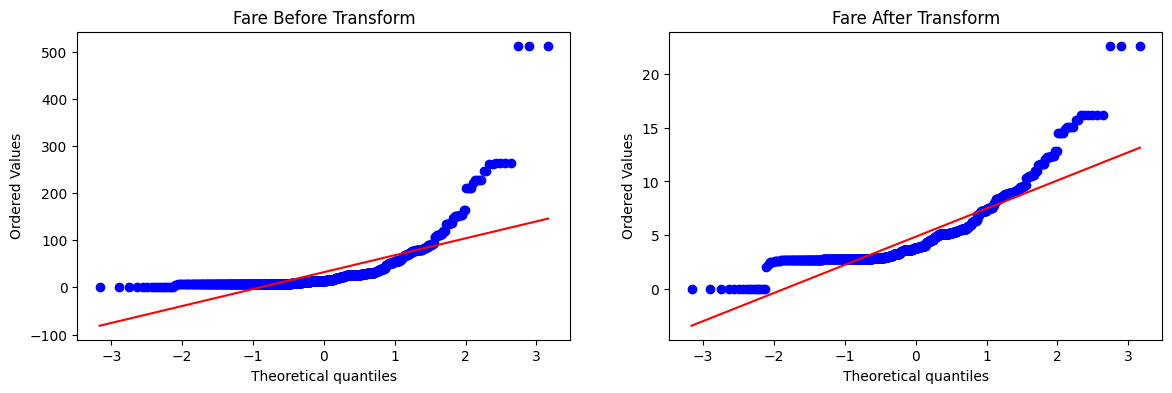

In [95]:
apply_transform(lambda x: x**(1/2))